In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_users_path = '../../Data/train_users_2.csv'

In [3]:
train_users = pd.read_csv(train_users_path)
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
print "We have {}".format(len(train_users))+" users in our training set"

We have 213451 users in our training set


In [5]:
gender = train_users.groupby('gender')['gender'].count()

In [6]:
gender

gender
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

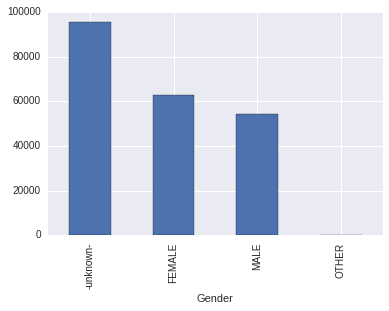

In [24]:
train_users.gender.value_counts(dropna=False).plot(kind='bar')
plt.xlabel('Gender')
sns.despine()

Females and Males are roughly equal 63041 and 54440 respectivly. Mainly we have unknown genders

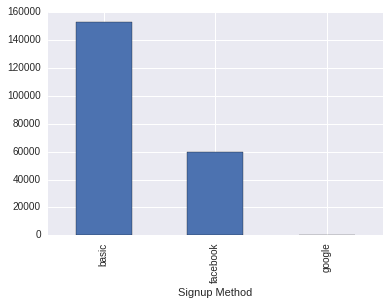

In [10]:
signup = train_users.groupby('signup_method')['signup_method'].count()
train_users.signup_method.value_counts(dropna=False).plot(kind='bar')
plt.xlabel('Signup Method')
sns.despine()

In [33]:
signup

signup_method
basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

In [11]:
#Looking into countries.csv
countries_path = '../../Data/countries.csv' 

countries = pd.read_csv(countries_path)
#10 different countries
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


The Levenshtein distance is a string metric for measuring the difference between two sequences. Informally, the Levenshtein distance between two words is the minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other. (From Wikipedia) https://en.wikipedia.org/wiki/Levenshtein_distance

Basically the distance of the destination language from english

In [12]:
lang = np.unique(countries['destination_language '])
langdic = defaultdict(float)

for l in lang:
    dis = countries.loc[countries['destination_language '] == l]['language_levenshtein_distance'].iloc[0]
    langdic[l] = dis

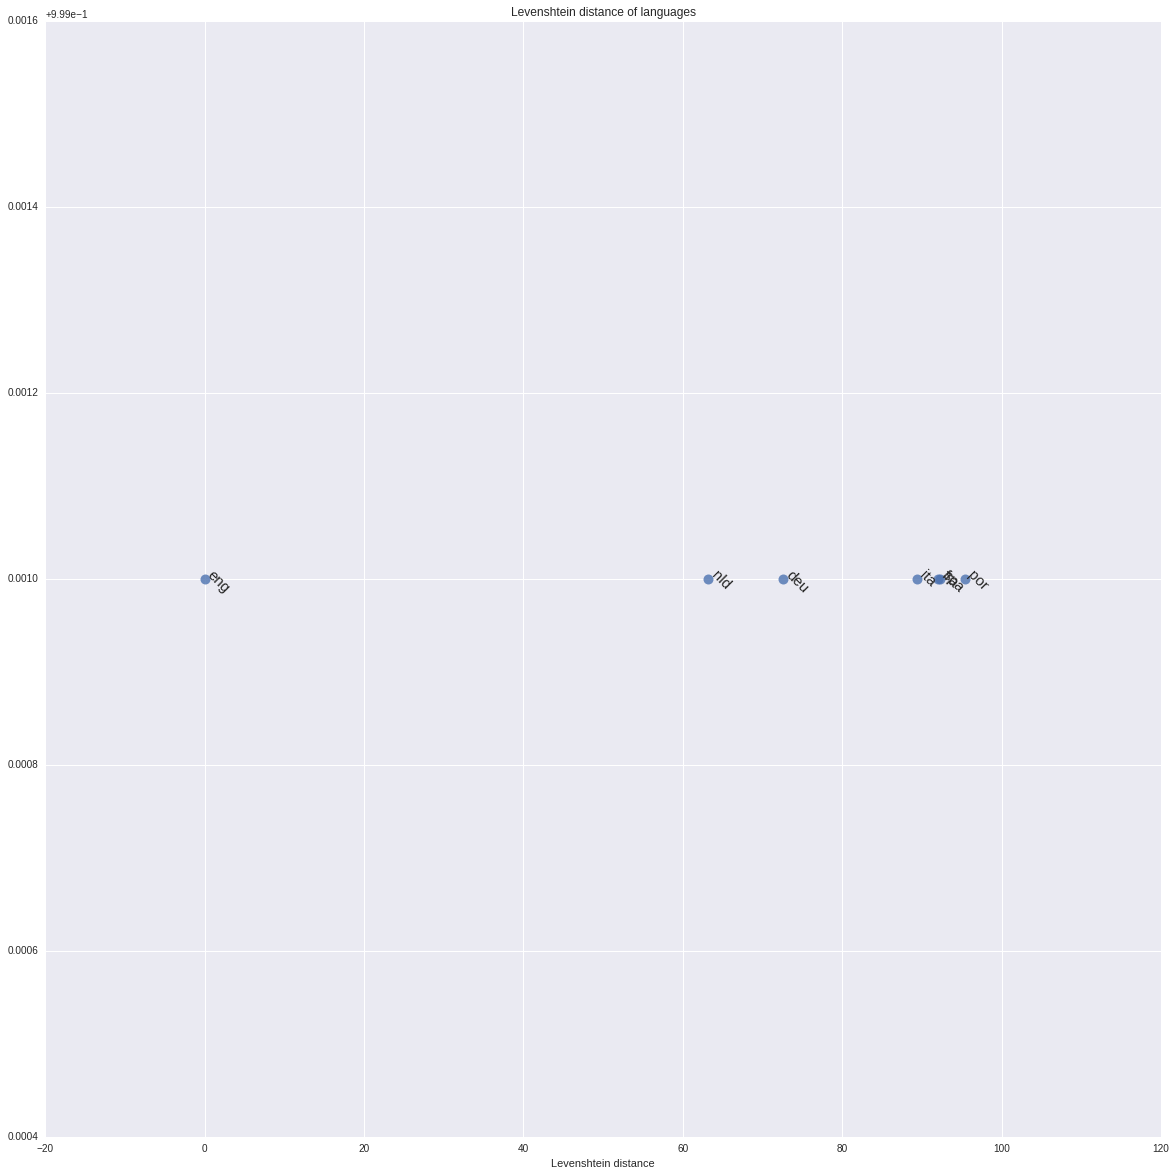

In [20]:
#Plot Levenshtein distance
plt.figure(figsize=(20,20))

A = np.array(langdic.values())
B = np.array([1,1,1,1,1,1,1])
labels = langdic.keys()
sns.regplot(A,B,fit_reg=False,scatter_kws={'s':100})
plt.title('Levenshtein distance of languages')
plt.xlabel('Levenshtein distance')
for x,y,z in zip(A,B,labels):  
    plt.annotate(z, xy=(x,y),textcoords='data',size=15,rotation=-45) 
plt.show()

In [54]:
age_gender_path = '../../Data/age_gender_bkts.csv'
age_gender = pd.read_csv(age_gender_path)
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [57]:
gender_count = pd.DataFrame({'count' : age_gender.groupby(['country_destination','gender'])['population_in_thousands'].sum()}).reset_index()

In [63]:
gender_count.head()

,country_destination,gender,count
0,AU,female,12024.0
1,AU,male,11899.0
2,CA,female,18066.0
3,CA,male,17805.0
4,DE,female,41997.0


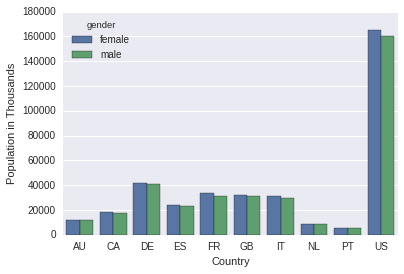

In [65]:
#Plot of genders who visit each country
sns.barplot(x=gender_count['country_destination'], y=gender_count['count'],hue=gender_count["gender"])
plt.xlabel('Country')
plt.ylabel('Population in Thousands')
sns.despine()

In [67]:
age_count = pd.DataFrame({'count' : age_gender.groupby(['country_destination','age_bucket'])['population_in_thousands'].sum()}).reset_index()
age_count.head()

,country_destination,age_bucket,count
0,AU,0-4,1605.0
1,AU,10-14,1450.0
2,AU,100+,5.0
3,AU,15-19,1505.0
4,AU,20-24,1607.0


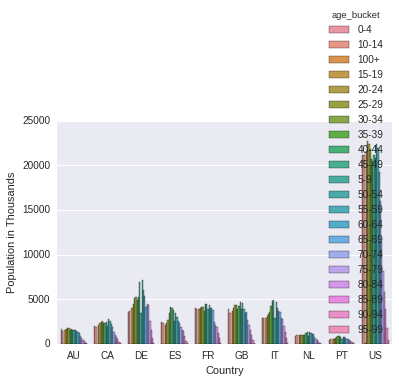

In [68]:
#Plot of genders who visit each country
sns.barplot(x=age_count['country_destination'], y=age_count['count'],hue=age_count["age_bucket"])
plt.xlabel('Country')
plt.ylabel('Population in Thousands')
sns.despine()

In [69]:
sessions_path = '../../Data/sessions.csv'
sessions = pd.read_csv(sessions_path)
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
sessions.groupby('action')['action'].sum()